# PCA

In [20]:
from sklearn.preprocessing import scale
from sklearn import decomposition
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np

In [21]:
df= pd.read_csv(r'../src/rawDataset.csv')
df.drop(columns=['RowNumber','Surname','CustomerId', 'Complain'], inplace= True)

We also drop the Complain colum because of its perfect correlation with the target feature. PCA attempts to reduce dimensionality by finding directions (principal components) that maximize variance. If a feature like Complain perfectly correlates with the target or other features, it will dominate the variance structure, skewing the PCA results.

### Data Preparation

In [22]:
encoder = OneHotEncoder(sparse_output=False, dtype=int)
catcols = ['Gender','Geography', 'Card Type']
encData = encoder.fit_transform(df[catcols])
encDF = pd.DataFrame(encData, columns=encoder.get_feature_names_out(catcols))
df = pd.concat([df.drop(columns= catcols),encDF],axis=1)

In [23]:
x = df.loc[:, df.columns != 'Exited']
y = df['Exited'].to_numpy()

### Data Scaling

In [24]:
x_scaled = scale(x)
print(pd.DataFrame(x_scaled, columns=x.columns).head().to_string(index=False))

 CreditScore      Age    Tenure   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Satisfaction Score  Point Earned  Gender_Female  Gender_Male  Geography_France  Geography_Germany  Geography_Spain  Card Type_DIAMOND  Card Type_GOLD  Card Type_PLATINUM  Card Type_SILVER
   -0.326221 0.293517 -1.041760 -1.225848      -0.911583   0.646092        0.970243         0.021886           -0.721130     -0.630839       1.095988    -1.095988          0.997204          -0.578736        -0.573809           1.728824       -0.577658            -0.57658         -0.576734
   -0.440036 0.198164 -1.387538  0.117350      -0.911583  -1.547768        0.970243         0.216534           -0.009816     -0.666251       1.095988    -1.095988         -1.002804          -0.578736         1.742740           1.728824       -0.577658            -0.57658         -0.576734
   -1.536794 0.293517  1.032908  1.333053       2.527057   0.646092       -1.030670         0.240687           -0.009816     -1.01

pca

### PCA Analysis

In [25]:
pca = decomposition.PCA(n_components=3)
pca.fit(x_scaled)

PCA(n_components=3)

In [26]:
scores = pca.transform(x_scaled)

scores_df = pd.DataFrame(scores, columns=[f'PC{i+1}' for i in range(scores.shape[1])])
scores_df

,PC1,PC2,PC3
0,1.449904,-1.420653,-0.579166
1,1.541320,0.623536,1.716155
2,1.593522,-0.817461,-0.698323
3,1.318095,-1.764661,-0.215819
4,1.316640,0.928896,1.541587
...,...,...,...
9995,-1.307059,-1.484943,-0.282853
9996,-1.404345,-0.987678,-0.775338
9997,1.378106,-1.709192,-0.413513
9998,-1.177377,1.632630,-0.278352


In [27]:
Exit = pd.DataFrame(y, columns=['Exit'])

scores_df = pd.concat([scores_df, Exit], axis=1)
scores_df

,PC1,PC2,PC3,Exit
0,1.449904,-1.420653,-0.579166,1
1,1.541320,0.623536,1.716155,0
2,1.593522,-0.817461,-0.698323,1
3,1.318095,-1.764661,-0.215819,0
4,1.316640,0.928896,1.541587,0
...,...,...,...,...
9995,-1.307059,-1.484943,-0.282853,0
9996,-1.404345,-0.987678,-0.775338,0
9997,1.378106,-1.709192,-0.413513,1
9998,-1.177377,1.632630,-0.278352,1


In [28]:
fig = px.scatter(
    scores_df,
    x='PC1',
    y='PC2',
    color='Exit',         # Color by 'Exit'
    size=scores_df['PC3'].abs(),  # Represent PC3 with absolute size
    opacity=0.7,          # Adjust opacity for better visibility
    hover_data=['PC3']    # Include PC3 in hover information
)

fig.show()

In [29]:
fig = px.scatter_3d(scores_df, x='PC1', y='PC2', z='PC3',
              color='Exit')

fig.show()

We can see 6 groups defined in the 3D scatter plot, which suggest that the data can be divided into 6 distinct subgroups based on the first three principal components.

### Explained Variance

Explained Variance:  [0.10592038 0.09837363 0.07922671]


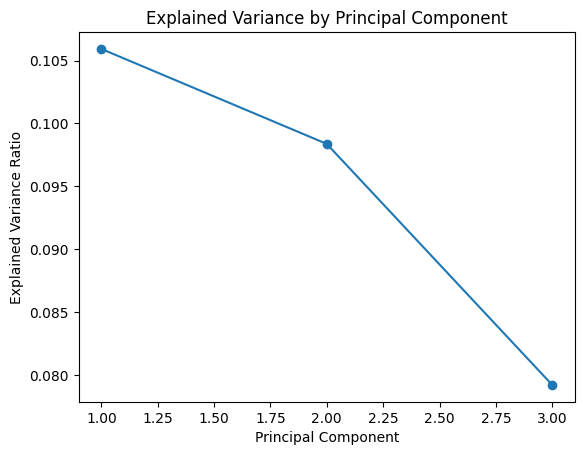

In [30]:
explained_variance = pca.explained_variance_ratio_
print('Explained Variance: ',explained_variance)

plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()

These values suggest that the dataset's variance is distributed across many dimensions, and we may need more components to capture a significant proportion of variance.

In [31]:
cumulative_variance = explained_variance.cumsum()
print('Cumulative Variance: ',cumulative_variance)

Cumulative Variance:  [0.10592038 0.20429401 0.28352072]


Three components capture only 28.35%, indicating that significant variance remains in higher dimensions.

Explained Variance:  [0.10592038 0.09837363 0.07922671 0.0703642  0.07024081 0.06993868
 0.05867969 0.05694834 0.05433165 0.05274557]
Cumulative Variance:  [0.10592038 0.20429401 0.28352072 0.35388492 0.42412573 0.49406441
 0.5527441  0.60969244 0.66402409 0.71676966]


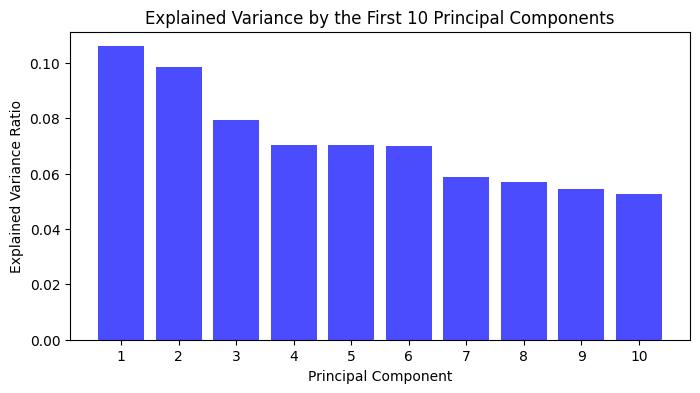

In [32]:
pca = decomposition.PCA(n_components=10)
pca.fit(x_scaled)

explained_variance = pca.explained_variance_ratio_
print('Explained Variance: ',explained_variance)

cumulative_variance = explained_variance.cumsum()
print('Cumulative Variance: ',cumulative_variance)

plt.figure(figsize=(8, 4))
plt.bar(range(1, 11), explained_variance, alpha=0.7, color='blue')
plt.title('Explained Variance by the First 10 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, 11))
plt.show()

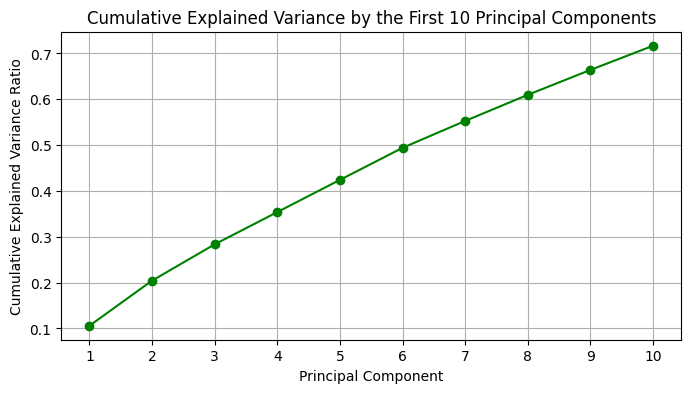

In [33]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), cumulative_variance, marker='o', linestyle='-', color='green')
plt.title('Cumulative Explained Variance by the First 10 Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

After testing various numbers of principal components (PCs), we observed that using 10 PCs captured over 70% of the cumulative variance in the data. This indicates that 10 PCs sufficiently represent the majority of the variability in the dataset, so we stay with it even if the dimensionality reduction isnt that big.

In [34]:
scores = pca.transform(x_scaled)

scores_df = pd.DataFrame(scores, columns=[f'PC{i+1}' for i in range(scores.shape[1])])
scores_df = pd.concat([scores_df, Exit], axis=1)
scores_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Exit
0,1.449904,-1.420653,-0.579166,1.890479,0.394268,0.549733,-1.052197,0.509604,0.107067,0.052368,1
1,1.541320,0.623536,1.716155,1.870597,0.334356,0.600690,-2.034446,-0.159205,-0.634271,-1.307317,0
2,1.593522,-0.817461,-0.698323,1.835221,0.364414,0.420861,1.915883,0.423938,1.171921,-1.169282,1
3,1.318095,-1.764661,-0.215819,-0.988621,-0.530080,1.950536,0.160156,0.264180,0.000116,-1.307333,0
4,1.316640,0.928896,1.541587,-0.932987,-0.698928,1.860912,-1.903192,-0.075054,0.911034,1.239344,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,-1.307059,-1.484943,-0.282853,2.092147,0.389727,0.383789,1.336956,0.843304,-0.347750,0.984056,0
9996,-1.404345,-0.987678,-0.775338,-0.806948,1.638382,-0.730150,-0.329279,-0.930845,1.705602,-0.384430,0
9997,1.378106,-1.709192,-0.413513,-0.108876,-1.541884,-1.002284,-1.203041,0.076410,-0.047501,0.339191,1
9998,-1.177377,1.632630,-0.278352,-0.998328,-0.537873,1.365209,1.567210,1.162932,-0.169521,0.771014,1


### Retrieve the lodings values

In [35]:
loadings = pca.components_.T 

selected_columns = x.columns

columns = [f'PC{i+1}' for i in range(pca.n_components_)]
df_loadings = pd.DataFrame(loadings, columns=columns, index=selected_columns).to_string(index=True)

# Step 4: Display the loadings DataFrame
print("PCA Loadings DataFrame:")
print(df_loadings)

PCA Loadings DataFrame:
                         PC1       PC2       PC3       PC4       PC5       PC6       PC7       PC8       PC9      PC10
CreditScore         0.003197  0.011345  0.014776  0.001870 -0.035921  0.037027 -0.026615  0.235893 -0.231481  0.605471
Age                 0.041709  0.076372 -0.010245 -0.026261  0.021745  0.010084 -0.439282  0.415262  0.153168 -0.095515
Tenure             -0.021519 -0.005748  0.016719  0.010194 -0.062902  0.024852  0.285366 -0.103325  0.321627  0.132842
Balance             0.027605  0.489158 -0.311919 -0.006732  0.010817 -0.047659 -0.162370 -0.195624 -0.010185  0.034340
NumOfProducts       0.019590 -0.186871  0.213083 -0.051270  0.007995 -0.007377  0.531891  0.567927 -0.043190 -0.117082
HasCrCard          -0.006981 -0.006405 -0.015618  0.023215 -0.003035 -0.045170  0.219947 -0.029043  0.429031  0.470351
IsActiveMember     -0.030647 -0.012675  0.040994 -0.073289 -0.013131  0.001121 -0.460112  0.509446  0.100171  0.024665
EstimatedSalary     0.01

Loading values help to interpret and understand how the original data is represented in the reduced space created by PCA, helping with model interpretation and decisions on feature selection.